<a href="https://colab.research.google.com/github/v-patel18/Data-Mining_Midterm-Projects/blob/master/Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from google.colab import files
uploaded = files.upload()

plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It is important to check the skewness of the "Sale Price" attribute. Having a normal distribution by log transforming the data would allow high priced houses and low priced houses to have the same effect on our model.

Skew is: 1.8828757597682129


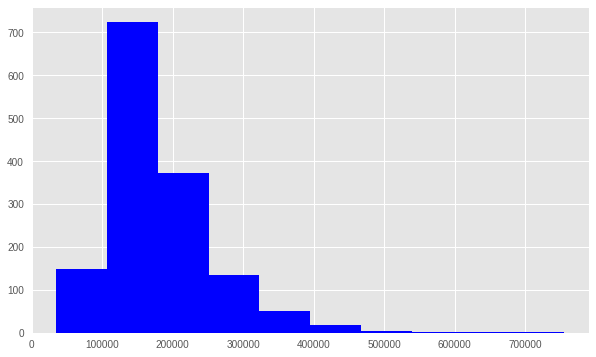

In [0]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color = 'blue')
plt.show()

Skew is: 0.12133506220520406


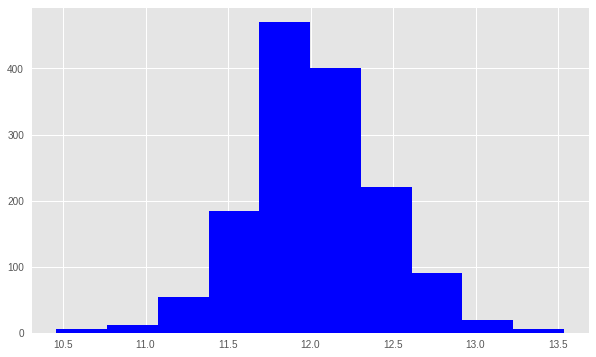

In [0]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color = 'blue')
plt.show()

**Data Processing:**

In [0]:
#Find the features that have numeric values

numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

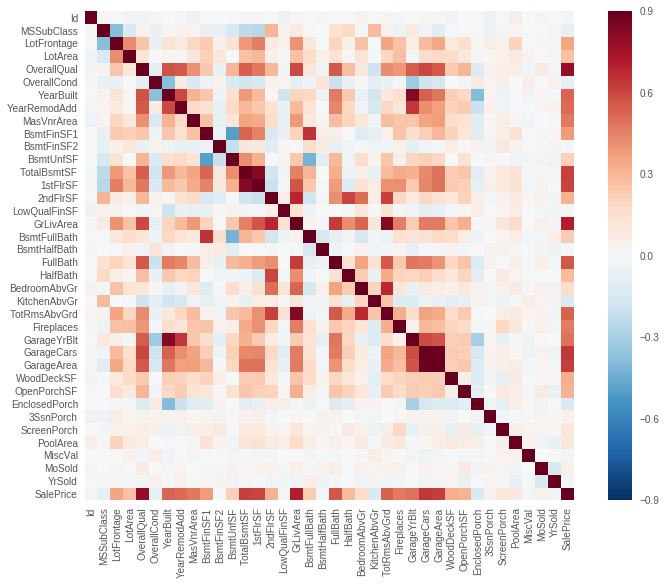

In [0]:
#Look at the heat map to realize which attributes are most correlated with Sale Price
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .9, square = True)

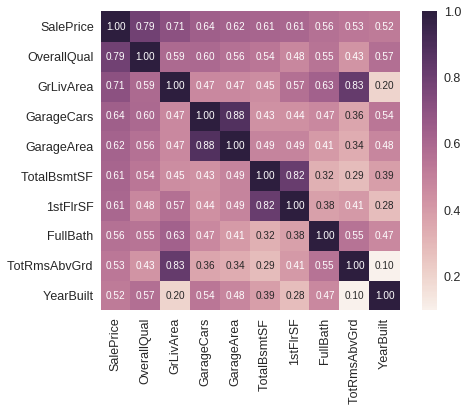

In [0]:
#Get a more close-up look
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

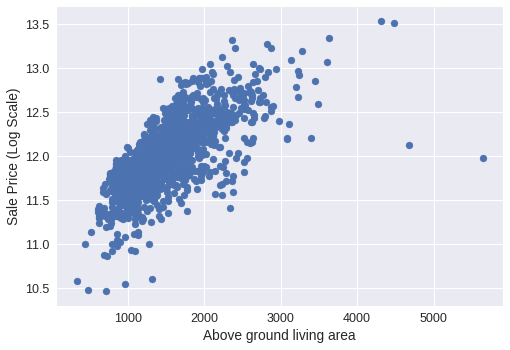

In [0]:
#Scatterplot of GridLivArea vs. Sale Price
plt.scatter(x = train['GrLivArea'], y = target)
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Above ground living area')
plt.show()

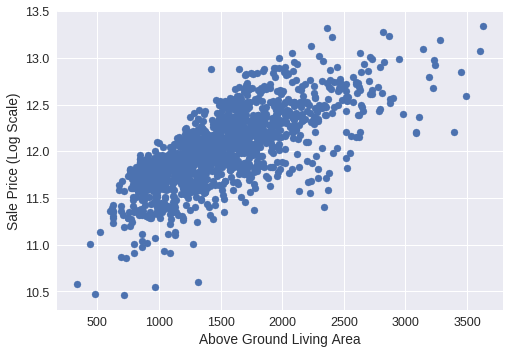

In [0]:
#Removing the outliers

train = train[train['GrLivArea'] < 4000]

#Make sure the outliers are out
plt.scatter(x = train['GrLivArea'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Above Ground Living Area')
plt.show()

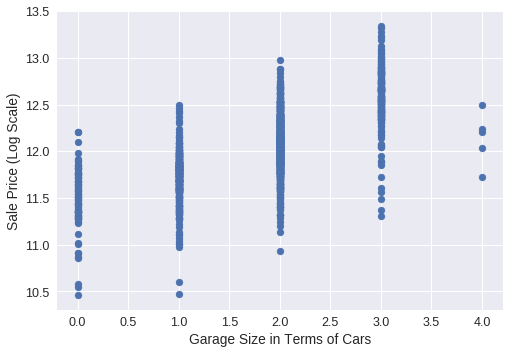

In [0]:
#Scatter plot of GarageCars vs. SalePrice
plt.scatter(x = train['GarageCars'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Garage Size in Terms of Cars')
plt.show()

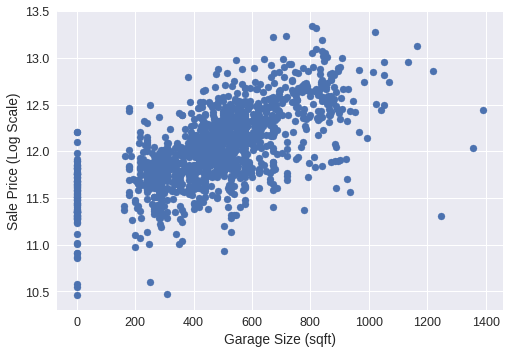

In [0]:
#Scatter plot of GarageArea vs Sale Price
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Garage Size (sqft)')
plt.show()

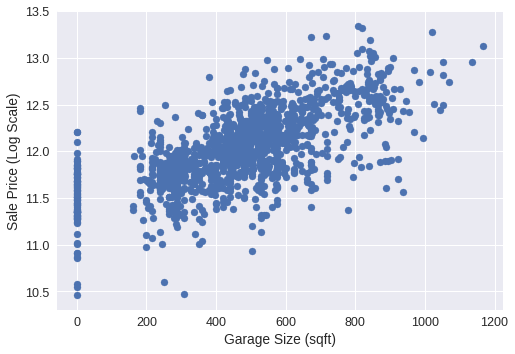

In [0]:
#Remove outliers above 1200 sqft

train = train[train['GarageArea'] < 1200]

#Make sure the outliers are out
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Garage Size (sqft)')
plt.show()

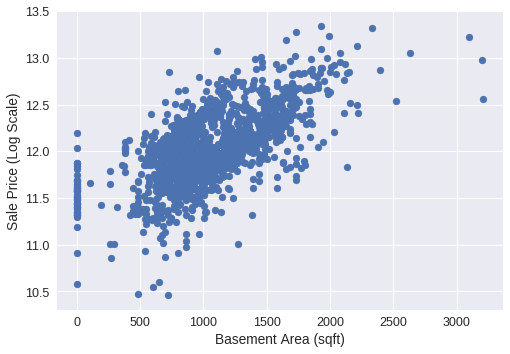

In [0]:
#Scatter plot of TotalBsmtSF vs Sale Price
plt.scatter(x = train['TotalBsmtSF'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Basement Area (sqft)')
plt.show()

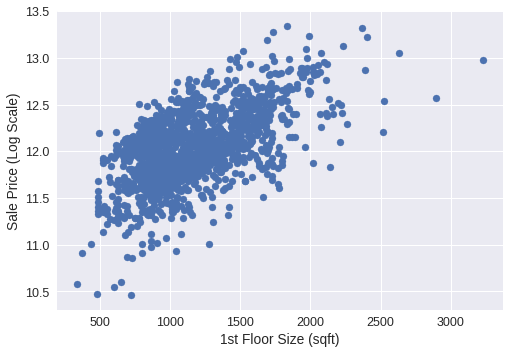

In [0]:
#Scatter plot of 1stFlrSF vs Sale Price
plt.scatter(x = train['1stFlrSF'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('1st Floor Size (sqft)')
plt.show()

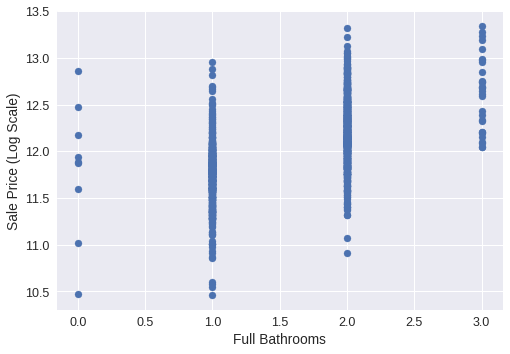

In [0]:
#Scatter plot of FullBath vs Sale Price
plt.scatter(x = train['FullBath'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Full Bathrooms')
plt.show()

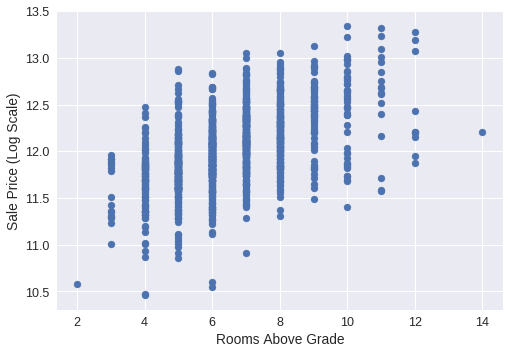

In [0]:
#Scatter plot of TotRmsAbvGrd vs. SalePrice
plt.scatter(x = train['TotRmsAbvGrd'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Rooms Above Grade')
plt.show()

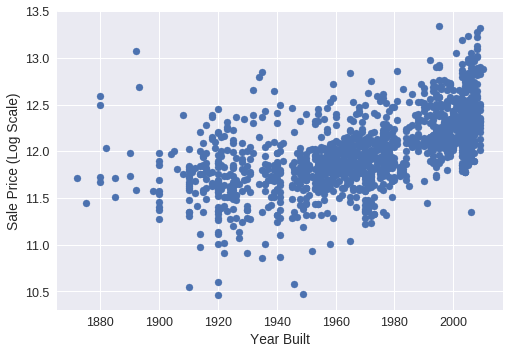

In [0]:
#Scatter plot of YearBuilt vs. SalePrice
plt.scatter(x = train['YearBuilt'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price (Log Scale)')
plt.xlabel('Year Built')
plt.show()

In [0]:
#Need to perform feature engineering on both the training set and the test set so combine the two sets

#Keep the number of houses in the train data set for later reference
num_train = train.shape[0]

y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data = all_data.drop(['SalePrice'], axis = 1)
print("All data size is: {}".format(all_data.shape))

All data size is: (2911, 80)


**Handle Missing Data**

In [0]:
#First find out which, and how much, data is missing
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Percent Missing' :all_data_na})
missing_data.head(50)


,Percent Missing
PoolQC,99.725180
MiscFeature,96.427345
Alley,93.198214
Fence,80.419100
FireplaceQu,48.746135
LotFrontage,16.660941
GarageQual,5.462041
GarageCond,5.462041
GarageFinish,5.462041
GarageYrBlt,5.462041


In [0]:
#PoolQC - NA = no pool

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#MiscFeature - NA = no misc. feature

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#Alley - NA = no alley access

all_data["Alley"] = all_data["Alley"].fillna("None")
#Fence - NA = no fence

all_data["Fence"] = all_data["Fence"].fillna("None")
#FireplaceQu - NA = no fireplace

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [0]:
#LotFrontage - NA is truly NA; can be replaced with the median LotFrontage value of the houses in the same neighborhood

#Find the median for each neighborhood by looking only at the training data
neighbor_and_lots = pd.DataFrame({'Neighborhood' : train['Neighborhood'], 'LotFrontage' : train['LotFrontage']})
neighbor_and_lots = neighbor_and_lots.dropna()
#print(neighbor_and_lots)

medians = neighbor_and_lots.groupby('Neighborhood')['LotFrontage'].apply(np.median)
mediansByLot = pd.DataFrame({'Median' : medians})
#mediansByLot.head(25)

mbyL_List = mediansByLot['Median'].tolist()
print(mbyL_List)

neighborhoods = train.Neighborhood.unique()
neighborhoods = sorted(neighborhoods)
#print(neighborhoods)

#Fill in the missing values for LotFrontage in train set with the median values generated above
lotFront = all_data['LotFrontage']
neighbor = all_data['Neighborhood']

for h in all_data['Id']:
  #print(h)
  if(h < 2912):
    singleVal = lotFront[h-1]
    singleVal_n = neighbor[h-1]
    if(np.isnan(singleVal)):
      neighbor_index = neighborhoods.index(singleVal_n)
      all_data.at[h-1, "LotFrontage"] = mbyL_List[neighbor_index]
      #print(neighbor_index)
  else:
    break


[43.0, 24.0, 21.0, 52.0, 80.0, 70.0, 74.0, 64.5, 65.0, 60.0, 21.0, 73.0, 73.0, 24.0, 80.0, 90.0, 86.5, 60.0, 60.0, 71.0, 66.5, 73.5, 61.5, 85.0, 68.0]


In [0]:
#GarageQual - NA = no garage
all_data["GarageQual"] = all_data["GarageQual"].fillna("None")

#GarageCond - NA = no garage
all_data["GarageCond"] = all_data["GarageCond"].fillna("None")

#GarageFinish - NA = no garage
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("None")

#GarageYrBlt - NA because no garage - replace with 0
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)

#GarageType - NA = no garage
all_data["GarageType"] = all_data["GarageType"].fillna("None")

#BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2 - NA = no basement
for x in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2'):
  all_data[x] = all_data[x].fillna("None")
  
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath - NA because no basement - replace with 0
for x in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  all_data[x] = all_data[x].fillna(0)
  
#MasVnrType - NA = no masonry veneer type
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

#MasVnrArea - NA because no masonry veneer type - replace with 0
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#MSZoning - NA because data not provided - replace with most common value (RL)
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

#Functional - NA to be assumed as 'Typical' as per the data_description file
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#Electrical - NA because no data provided - only 1 missing data - replace with mode (SBrkr)
all_data["Electrical"] = all_data["Electrical"].fillna(train["Electrical"].mode()[0])

#KitchenQual - NA because no data provided - only 1 missing data - replace with mode (Typical)
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(train["KitchenQual"].mode()[0])

#Exterior1st, Exterior2nd - NA because no data provided - only 1 missing data - replace with mode
for x in ['Exterior1st', 'Exterior2nd']:
  all_data[x] = all_data[x].fillna(train[x].mode()[0])

#GarageArea, GarageCars - NA because no garage - replace with 0
for x in ['GarageArea', 'GarageCars']:
  all_data[x] = all_data[x].fillna(0)
  
#SaleType - NA because no data provided - replace with mode (WD), which is also the conventional type, according to the description file
all_data["SaleType"] = all_data["SaleType"].fillna(train["SaleType"].mode()[0])

#Utilities - two NAs, both in the test data; everything else is 'AllPub' - removing the column shouldn't affect the model much
all_data = all_data.drop(['Utilities'], axis = 1)

**Dealing with Categorical Data**

In [0]:
#Ordinal data - label encoder          Nominal data(order doesn't matter) - one hot encoding

ord_cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

for c in ord_cols:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c] = lbl.transform(list(all_data[c].values))
  
#Check the shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2911, 79)


In [0]:
#Nominal data (order doesn't matter) - one hot encoding

all_data = pd.get_dummies(all_data)
all_data.shape



(2911, 220)

**Create the Model**

In [0]:
#Separate the train and test data
train = all_data[:num_train]
test = all_data[num_train:]

non_numeric_features = all_data.select_dtypes(exclude = [np.number])
non_numeric_features.dtypes


Series([], dtype: object)

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Normalize the SalePrice in the actual train set
y_train = np.log(y_train)

k_folds = 5

def rmsle_cv(model):
  kf = KFold(k_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = "neg_mean_squared_error", cv = kf))
  return(rmse)

#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1124 (0.0068)



In [0]:
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1125 (0.0069)



In [0]:
#Gradient Boosting
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1171 (0.0071)



In [0]:
#Fit the model

LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

In [0]:
#Predict and average all models together

finalMd = (np.expm1(LassoMd.predict(test.values)) + np.expm1(ENetMd.predict(test.values)) + np.expm1(GBoostMd.predict(test.values)) ) / 3
finalMd

array([121646.81576463, 154011.32711774, 181789.26454587, ...,
       164826.83109007, 113113.07939333, 223781.86935481])

In [0]:
#Create the submission file
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = finalMd
sub.to_csv('submission.csv',index=False)

In [0]:
#Download the submission file
files.download('submission.csv')